In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
%pip install tensorflow
%pip install keras
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 20s 0us/step


Training data shape :  (50000, 32, 32, 3) (50000, 1)
Testing data shape :  (10000, 32, 32, 3) (10000, 1)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : [3]')

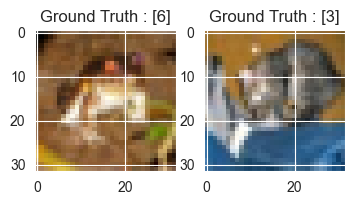

In [3]:
nRows,nCols,nDims = train_images.shape[1:]
train_data = train_images.reshape(train_images.shape[0], nRows, nCols, nDims)
test_data = test_images.reshape(test_images.shape[0], nRows, nCols, nDims)
input_shape = (nRows, nCols, nDims)

train_data = train_data.astype('float64')
test_data = test_data.astype('float64')

print('Training data shape : ', train_images.shape, train_labels.shape)

print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

plt.figure(figsize=[4,2])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [4]:
train_data /= 255
test_data /= 255

train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

In [5]:
print('Original label 0 : ', train_labels[0])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[0])

Original label 0 :  [6]
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [6]:
def createModel():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.16))
    
    model.add(Conv2D(16, (5, 5), padding='same', activation='relu'))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [7]:
model1 = createModel()
batch_size = 256
epochs = 20
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

C:\Users\PC\PycharmProjects\Labs_DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 16)     │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 10, 10, 16)     │         6,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       205,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 230,906 (901.98 KB)

 Trainable params: 230,906 (901.98 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
history = model1.fit(
    train_data
    , train_labels_one_hot
    , batch_size=batch_size
    , epochs=epochs
    , verbose=2
)
model1.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
196/196 - 19s - 95ms/step - accuracy: 0.5211 - loss: 1.3231
Epoch 2/20
196/196 - 17s - 85ms/step - accuracy: 0.5576 - loss: 1.2294
Epoch 3/20
196/196 - 18s - 90ms/step - accuracy: 0.5804 - loss: 1.1703
Epoch 4/20
196/196 - 19s - 97ms/step - accuracy: 0.6010 - loss: 1.1190
Epoch 5/20
196/196 - 19s - 97ms/step - accuracy: 0.6185 - loss: 1.0724
Epoch 6/20
196/196 - 17s - 87ms/step - accuracy: 0.6284 - loss: 1.0406
Epoch 7/20
196/196 - 18s - 93ms/step - accuracy: 0.6456 - loss: 0.9967
Epoch 8/20
196/196 - 17s - 86ms/step - accuracy: 0.6522 - loss: 0.9718
Epoch 9/20
196/196 - 17s - 89ms/step - accuracy: 0.6657 - loss: 0.9409
Epoch 10/20
196/196 - 18s - 92ms/step - accuracy: 0.6747 - loss: 0.9189
Epoch 11/20
196/196 - 17s - 85ms/step - accuracy: 0.6820 - loss: 0.8975
Epoch 12/20
196/196 - 17s - 85ms/step - accuracy: 0.6927 - loss: 0.8643
Epoch 13/20
196/196 - 18s - 91ms/step - accuracy: 0.6990 - loss: 0.8521
Epoch 14/20
196/196 - 18s - 91ms/step - accuracy: 0.7024 - loss: 0.8336
E

[0.8133176565170288, 0.7161999940872192]

Text(0.5, 1.0, 'Accuracy Curves')

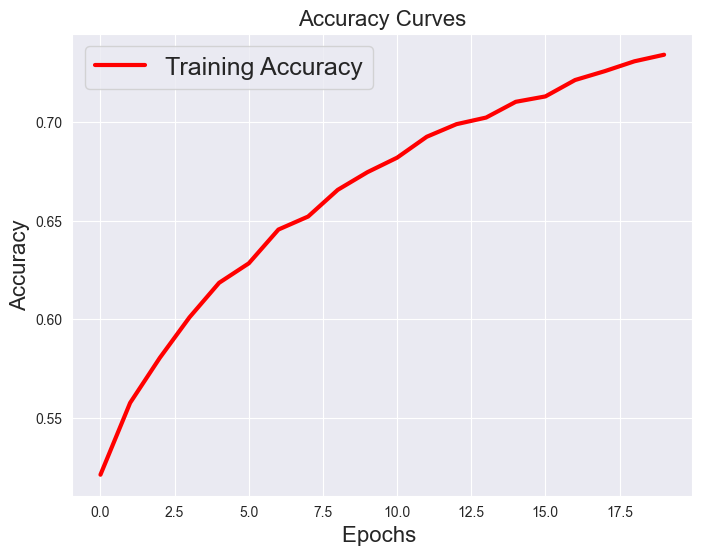

In [11]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [12]:
predictions = model1.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


0 - Avion  
1 - Carros  
2 - Pajaro  
3 - Gatos  
4 - Venado  
5 - Perros  
6 - Ranas  
7 - Caballos  
8 - Botes  
9 - Camiones  

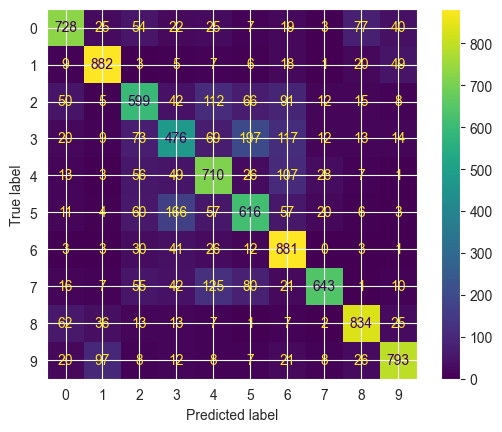

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))

ConfusionMatrixDisplay(cm).plot()

# MODELO 2

In [14]:
def createModel2():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

model2 = createModel2()
batch_size = 256
epochs = 20
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

model2.summary()

C:\Users\PC\PycharmProjects\Labs_DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 15, 15, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 16)     │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       295,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 307,962 (1.17 MB)

 Trainable params: 307,962 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history2 = model2.fit(
    train_data
    , train_labels_one_hot
    , batch_size=batch_size
    , epochs=epochs
    , verbose=2
)
model2.evaluate(test_data, test_labels_one_hot)

Epoch 1/20
196/196 - 16s - 80ms/step - accuracy: 0.3320 - loss: 1.8068
Epoch 2/20
196/196 - 15s - 77ms/step - accuracy: 0.4470 - loss: 1.5134
Epoch 3/20
196/196 - 15s - 77ms/step - accuracy: 0.4916 - loss: 1.4061
Epoch 4/20
196/196 - 15s - 76ms/step - accuracy: 0.5202 - loss: 1.3404
Epoch 5/20
196/196 - 16s - 79ms/step - accuracy: 0.5437 - loss: 1.2800
Epoch 6/20
196/196 - 16s - 80ms/step - accuracy: 0.5577 - loss: 1.2375
Epoch 7/20
196/196 - 18s - 92ms/step - accuracy: 0.5724 - loss: 1.2007
Epoch 8/20
196/196 - 17s - 85ms/step - accuracy: 0.5896 - loss: 1.1568
Epoch 9/20
196/196 - 16s - 82ms/step - accuracy: 0.6012 - loss: 1.1225
Epoch 10/20
196/196 - 16s - 83ms/step - accuracy: 0.6137 - loss: 1.0919
Epoch 11/20
196/196 - 16s - 79ms/step - accuracy: 0.6231 - loss: 1.0617
Epoch 12/20
196/196 - 16s - 80ms/step - accuracy: 0.6377 - loss: 1.0335
Epoch 13/20
196/196 - 16s - 80ms/step - accuracy: 0.6404 - loss: 1.0175
Epoch 14/20
196/196 - 16s - 80ms/step - accuracy: 0.6496 - loss: 0.9917
E

[0.8307369351387024, 0.7093999981880188]

Text(0.5, 1.0, 'Accuracy Curves')

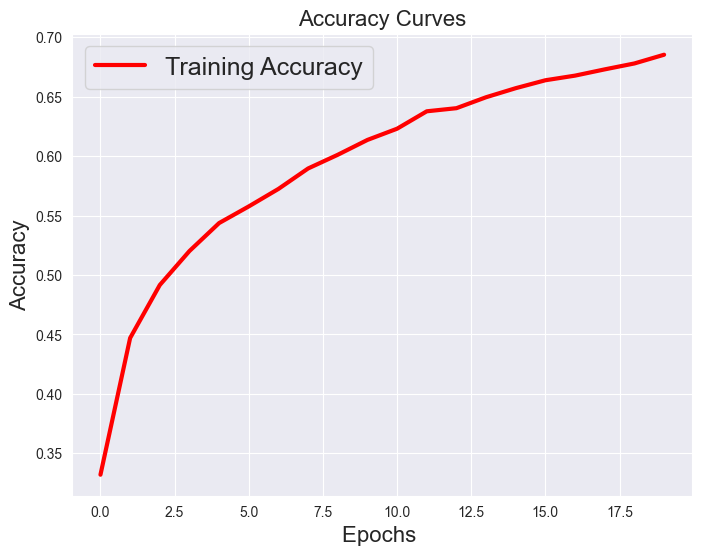

In [16]:
plt.figure(figsize=[8,6])
plt.plot(history2.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [17]:
predictions = model2.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


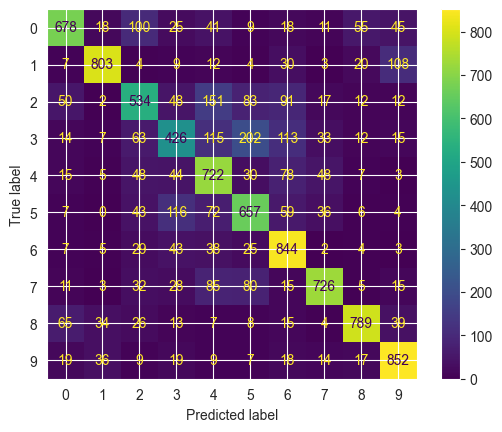

In [28]:
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))

ConfusionMatrixDisplay(cm).plot()

## Modelo 3

In [19]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

train_data_gray = rgb2gray(train_images.reshape(train_images.shape[0], nRows, nCols, nDims))
test_data_gray = rgb2gray(test_images.reshape(test_images.shape[0], nRows, nCols, nDims))

train_data_gray = train_data_gray.astype('float32')
test_data_gray = test_data_gray.astype('float32')

train_data_gray /= 255
test_data_gray /= 255

In [20]:
def createModel_3():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 1)))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(16, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
    
    return model

In [21]:
model3 = createModel_3()
batch_size = 256
epochs = 20
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

C:\Users\PC\PycharmProjects\Labs_DL\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
history3 = model3.fit(
    train_data_gray
    , train_labels_one_hot
    , batch_size=batch_size
    , epochs=epochs
    , verbose=2
)

Epoch 1/20
196/196 - 15s - 79ms/step - accuracy: 0.2768 - loss: 1.9682
Epoch 2/20
196/196 - 16s - 79ms/step - accuracy: 0.4281 - loss: 1.6072
Epoch 3/20
196/196 - 15s - 78ms/step - accuracy: 0.4826 - loss: 1.4640
Epoch 4/20
196/196 - 16s - 84ms/step - accuracy: 0.5171 - loss: 1.3773
Epoch 5/20
196/196 - 16s - 83ms/step - accuracy: 0.5384 - loss: 1.3076
Epoch 6/20
196/196 - 16s - 80ms/step - accuracy: 0.5606 - loss: 1.2514
Epoch 7/20
196/196 - 16s - 80ms/step - accuracy: 0.5772 - loss: 1.2116
Epoch 8/20
196/196 - 16s - 80ms/step - accuracy: 0.5895 - loss: 1.1727
Epoch 9/20
196/196 - 16s - 80ms/step - accuracy: 0.6021 - loss: 1.1379
Epoch 10/20
196/196 - 16s - 80ms/step - accuracy: 0.6172 - loss: 1.0994
Epoch 11/20
196/196 - 16s - 79ms/step - accuracy: 0.6239 - loss: 1.0803
Epoch 12/20
196/196 - 16s - 80ms/step - accuracy: 0.6316 - loss: 1.0567
Epoch 13/20
196/196 - 16s - 82ms/step - accuracy: 0.6422 - loss: 1.0302
Epoch 14/20
196/196 - 16s - 84ms/step - accuracy: 0.6456 - loss: 1.0114
E

In [23]:
model3.evaluate(test_data_gray, test_labels_one_hot)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7096 - loss: 0.8519


[0.866234540939331, 0.7031000256538391]

Text(0.5, 1.0, 'Accuracy Curves')

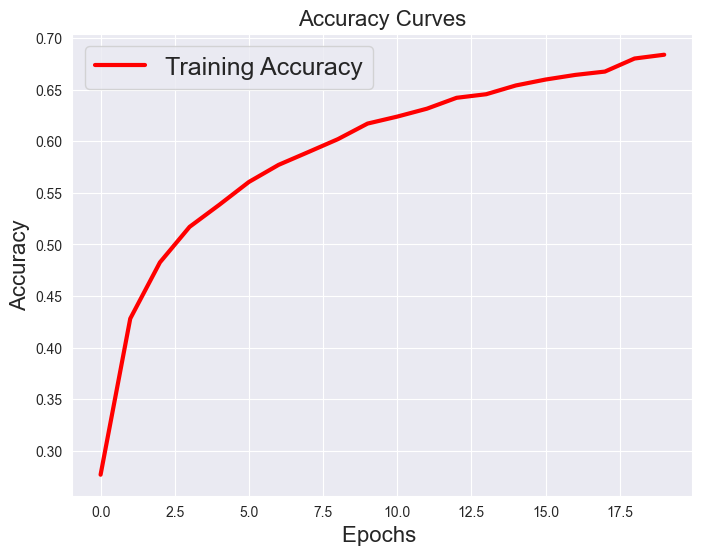

In [24]:
plt.figure(figsize=[8,6])
plt.plot(history3.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [26]:
predictions = model3.predict(test_data_gray)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


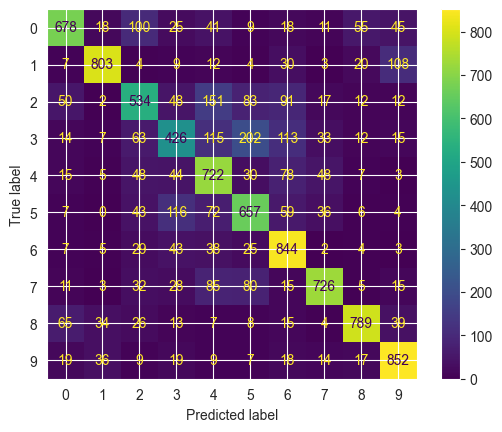

In [27]:
cm = confusion_matrix(test_labels_one_hot.argmax(axis=1), predictions.argmax(axis=1))
ConfusionMatrixDisplay(cm).plot()

# Reporte
En este proyecto realizamos algunos cambios a las redes neuronales que estaban en el ejemplo original. Algunos de estos cambios fueron directamente a las redes, mientras que otros son al preprocesamiento. El cambio principal de preprocesamiento que decidimos hacer fue colocar las impagenes en blanco y negro. Se tenía la teoría de que una de las razones por las que la red no era tan buena es porque confundía los fondos, particularmente con los colores. Sin embargo, luego de hacer esto y mantener la misma red, el porcentaje de Accuracy subió solamente unas décimas, por lo que hay otros factores más relevantes que pueden mejorar. 

Decidimos entonces utilizar el preprocesamiento original, pero convirtiendo las imágenes a float64 para intntar tener más información, y la principal diferencia es que en la primera capa de la red incorporamos el cambio de en lugar de tener una matriz 3x3, tomamos una 5x5. Además de esto, cambiamos la probabilidad de dropout de la primera y última capa. Esto fue lo que logró que tuviéramos 3% más de accuracy que el original. Consideramos que esto sucede porque cada neurona aprende un poco más de los datos, sin llegar aún al sobreajuste.

Consideramos por otro lado que algunos errores que podemos tener es respecto a la cantidad de filtros utilizados. VEamos que con los que más se confunde son con los gatos y perros que tienen características muy similares, por lo que agregar más filtros en las capas podría solucionar eso, aunque har+a que la red también tarde más. Otra falla que puede estar teniendo es nuestro método de regularización, veamos que puede que el método de regularización de batch size o algún otro sea más efectivo para asegurar que a todas las impégenes de les da la misma importancia en cada batch.